In [101]:
#Exploratory Data Analysis
#The analysis of what sorts of people were likely to survive.
#Titanic Dataset - training set (train.csv) is given by kaggle ; you can download from kaggle directly kaggle 
#https://www.kaggle.com/c/titanic/data

In [1]:
#Titanic The Great !!!
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

In [3]:
#Importing pandas library as keyword pd and corresponding functions
#Reading csv into dataframe
import pandas as pd
from pandas import Series, DataFrame
titanic_df=pd.read_csv("train.csv")

In [4]:
#Data Dictionary
#Survived: 0 = No, 1 = Yes
#pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
#sibsp: # of siblings / spouses aboard the Titanic
#parch: # of parents / children aboard the Titanic
#ticket: Ticket number
#cabin: Cabin number
#embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

#Printing first 5 rows of the titanic dataset.
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Printing Column info of the titanic dataframe
#We can see that Age value is missing for many rows.
#Out of 891 rows, the Age value is present only in 714 rows.
#Similarly, Cabin values are also missing in many rows. Only 204 out of 891 rows have Cabin values.
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


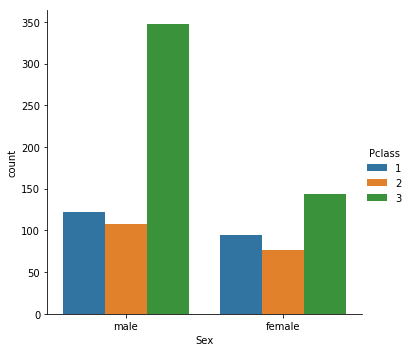

In [6]:
#Importing seaborn library as keyword sns
#Using catplot function to get the count of passengers class wise - First Class - PClass-1 & so on....
import seaborn as sns
sns.catplot('Sex',data=titanic_df,hue='Pclass',kind='count')

In [7]:
#Authoring a function to segregate children
def male_female_child(passenger):
    age,sex=passenger
    
    if age<16:
        return 'child'
    else:
        return sex

In [8]:
#Creating a new column called "person" to store the new classification of passengers and verifying
#axis=0 (or axis='rows' is horizontal axis. axis=1 (or axis='columns') is vertical axis.
titanic_df['person']=titanic_df[['Age','Sex']].apply(male_female_child, axis=1)
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


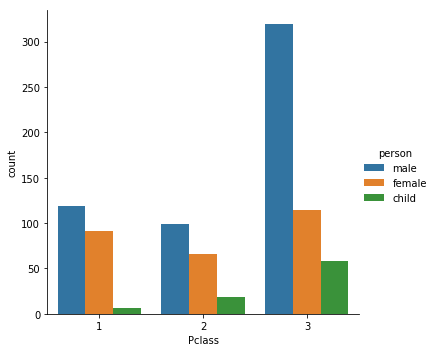

In [9]:
#Using catplot function to get the count of males, females & children class wise
sns.catplot('Pclass',data=titanic_df,hue='person',kind='count')

In [10]:
#Removing NaN (Not a Number) values from Cabin column to get the unique list of Cabins
deck =  titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

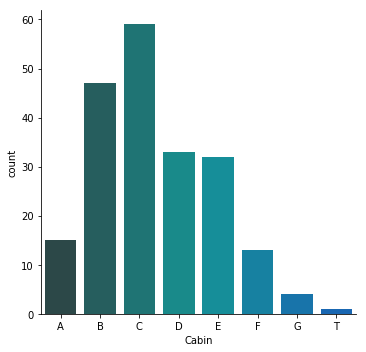

In [11]:
#Extracting Cabin Letter - A,B,C,... & so on...
levels=[]

for lev in deck:
    levels.append(lev[0])

cabin_df=DataFrame(levels)
cabin_df.columns = ['Cabin']

sns.catplot('Cabin',data=cabin_df,palette='winter_d',kind='count',order=['A','B','C','D','E','F','G','T'])

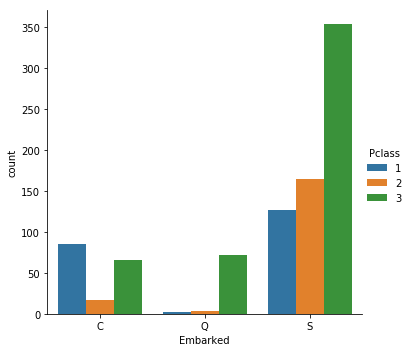

In [12]:
#Using catplot function to get the count of Passegers emabarked city & class wise
#embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
sns.catplot('Embarked',data=titanic_df,hue='Pclass',kind='count',order=['C','Q','S'])

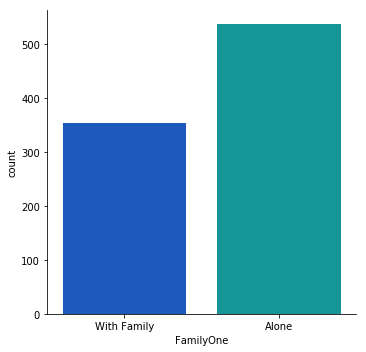

In [15]:
#Creating a new column called "familyone" to classify if they were with family or alone and verifying...
#titanic_df['FamilyOne']=titanic_df.SibSp+titanic_df.Parch
#titanic_df.head()

#Replascing familyone flag with relevant text and verifying...
#titanic_df['FamilyOne'].loc[titanic_df['FamilyOne'] > 0] = 'With Family'
#titanic_df['FamilyOne'].loc[titanic_df['FamilyOne'] == 0] = 'Alone'
#titanic_df.head()

#Using catplot function to get the count of Passegers with family and alone
sns.catplot('FamilyOne',data=titanic_df,palette='winter',kind='count')

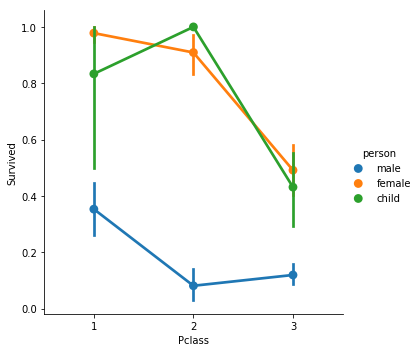

In [16]:
#Using catplot function to depict the avg rate of survival classwise for persons
sns.catplot('Pclass','Survived',data=titanic_df,hue='person',kind='point')

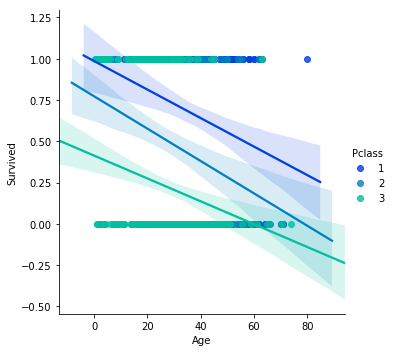

In [18]:
#Using lmplot function to depict how the survival rate decreasing with increasing age - class wise
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter')

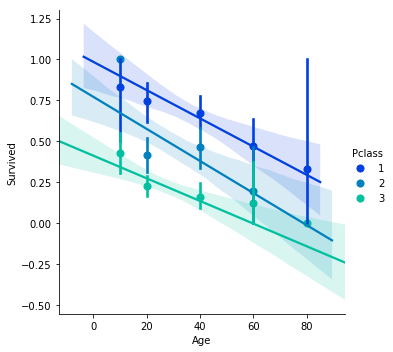

In [20]:
#Using lmplot function to depict how the survival rate decreasing with increasing age - class wise - Here put them in bins
generations = [10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

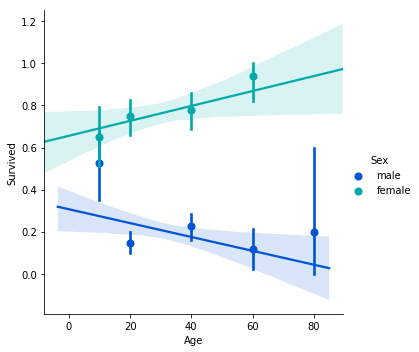

In [21]:
#Using lmplot function to depict how the survival rate changes with increasing age - Sex wise
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

In [22]:
#Creating a new column called "Deck" to extract deck value and verifying...
titanic_df['Deck']=titanic_df['Cabin'].str[0]
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,FamilyOne,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,NaN


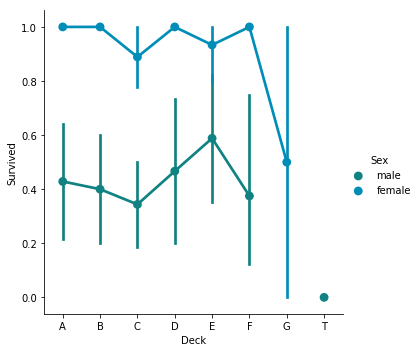

In [23]:
#Using catplot function to depict average survival rate Deck wise - Person wise
sns.catplot('Deck','Survived',hue='Sex',data=titanic_df,palette='winter_d',kind='point',order=['A','B','C','D','E','F','G','T'])

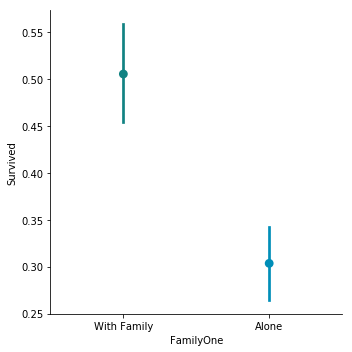

In [24]:
#Using catplot function to depict that passengers with Family had higher survival rate than the passengers alone
sns.catplot('FamilyOne','Survived',data=titanic_df,palette='winter_d',kind='point')

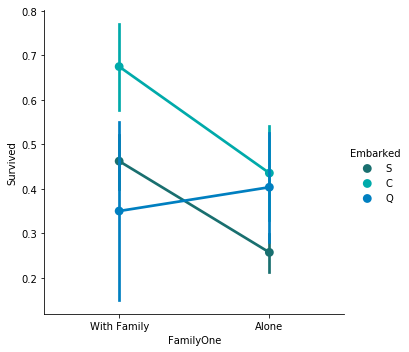

In [25]:
#Using catplot function to depict that passengers with Family had higher survival rate than the passengers alone 
#Digging in more depth based on port of embarked
sns.catplot('FamilyOne','Survived',hue='Embarked',data=titanic_df,palette='winter_d',kind='point')

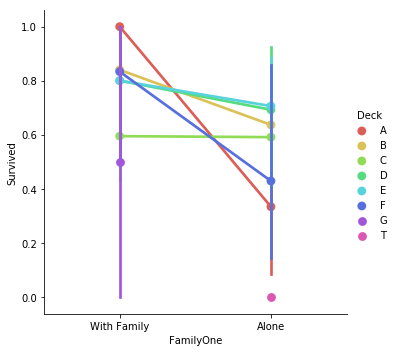

In [26]:
#Using catplot function to depict that passengers with Family had higher survival rate than the passengers alone 
#Digging in more depth based on Deck
sns.catplot('FamilyOne','Survived',hue='Deck',data=titanic_df,palette='hls',kind='point',hue_order=['A','B','C','D','E','F','G','T'])

In [25]:
#how titanic sank?
#sank from the bow of the ship where third class rooms located
#conclusion, Pclass is key feature for classifier

Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

In [28]:
def bar_chart(feature):
    survived = titanic_df[titanic_df['Survived']==1][feature].value_counts()
    dead = titanic_df[titanic_df['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

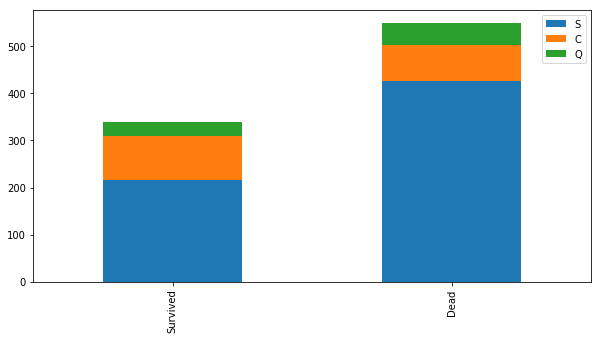

In [33]:
#bar_chart('Sex')
#The Chart confirms Women more likely survivied than Men

#bar_chart('Pclass')
#The Chart confirms 1st class more likely survivied than other classes
#The Chart confirms 3rd class more likely dead than other classes

#bar_chart('SibSp')
#The Chart confirms a person aboarded with more than 2 siblings or spouse more likely dead
#The Chart confirms a person aboarded without siblings or spouse more likely dead

#bar_chart('Parch')
#The Chart confirms a person aboarded with more than 3 parents or children more likely dead
#The Chart confirms a person aboarded alone more likely dead

#bar_chart('Embarked')
#The Chart confirms a person aboarded from S more likely dead
#The Chart confirms a person aboarded from C slightly more likely survived
#The Chart confirms a person aboarded from Q more likely dead

In [ ]:
#Conclusions
#From my exploratory analysis of Titanic dataset I conclude that, 
#1. Female had higher chances of survival. 
#2. Passengers with Family had higher chance of survival.
#3. We can also see that Class(Socio-Economic status) of the passengers had played a role in their survival. 

In [4]:
#import pandas as pd
#from pandas_profiling import ProfileReport

In [8]:
#ProfileReport(titanic_df)

Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.6 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [9]:
#titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
